In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./R03_50")


In [3]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [4]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [5]:
data = dataset.iloc[: ,:16]
data['label'] = dataset['label']

In [6]:
data.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,Cz..,C2..,C4..,C6..,Cp5.,Cp3.,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,-29.0,-15.0,-15.0,-25.0,-10.0,-14.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,-41.0,-31.0,-34.0,-46.0,-23.0,-30.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,-53.0,-41.0,-48.0,-56.0,-50.0,-47.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,-65.0,-55.0,-58.0,-67.0,-50.0,-60.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,-73.0,-66.0,-64.0,-70.0,-48.0,-71.0,0


In [7]:
data.shape

(985952, 17)

In [8]:
from sklearn.model_selection import train_test_split
X = data.drop(columns={"label"})
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)




In [9]:
train_accuracies = []

In [2]:
model = Sequential()
# model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(Conv1D(32,kernel_size=3, activation='relu' ,input_shape=(64,1)))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 62, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 64)            4160      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 14, 128)           16512     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 7, 128)           0

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, epochs=1)  
    train_accuracies.append(history.history['acc'][0])



epoch 1/100
Train on 788761 samples
788761/788761 [==============================] - 131s 166us/sample - loss: 1.0053 - acc: 0.5182
epoch 2/100
Train on 788761 samples
788761/788761 [==============================] - 98s 124us/sample - loss: 0.9509 - acc: 0.5481
epoch 3/100
Train on 788761 samples
788761/788761 [==============================] - 82s 104us/sample - loss: 0.9154 - acc: 0.5684
epoch 4/100
Train on 788761 samples
788761/788761 [==============================] - 82s 104us/sample - loss: 0.8925 - acc: 0.5812
epoch 5/100
Train on 788761 samples
788761/788761 [==============================] - 82s 104us/sample - loss: 0.8765 - acc: 0.5892
epoch 6/100
Train on 788761 samples
788761/788761 [==============================] - 82s 103us/sample - loss: 0.8640 - acc: 0.5961
epoch 7/100
Train on 788761 samples
788761/788761 [==============================] - 82s 103us/sample - loss: 0.8538 - acc: 0.6021
epoch 8/100
Train on 788761 samples
788761/788761 [==============================]

In [15]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.8226
Test Accuracy: 0.6309


In [16]:
print(train_accuracies)

[0.51822793, 0.5480976, 0.56839526, 0.5812065, 0.5892178, 0.59608805, 0.60210633, 0.60617477, 0.60981464, 0.6130501, 0.61585575, 0.61844206, 0.62009406, 0.6224902, 0.6244173, 0.62551904, 0.62682104, 0.62772375, 0.6295722, 0.63105935, 0.63136107, 0.63235253, 0.63312334, 0.6340362, 0.6342035, 0.6356349, 0.6359049, 0.6361509, 0.6372006, 0.63753784, 0.638064, 0.6385534, 0.6392038, 0.6396551, 0.64002025, 0.64021295, 0.6405844, 0.64107, 0.6413984, 0.6416088, 0.6420893, 0.6421768, 0.6421679, 0.6425368, 0.64264715, 0.64270294, 0.64302367, 0.64281577, 0.64261293, 0.64341545, 0.6438148, 0.6436259, 0.6440658, 0.6442598, 0.6439137, 0.6437869, 0.6445831, 0.64494824, 0.6447948, 0.6453463, 0.64458436, 0.64454377, 0.6455808, 0.6450991, 0.6447999, 0.6456544, 0.6450763, 0.6459574, 0.6452956, 0.64533234, 0.64521194, 0.6449596, 0.64513075, 0.64572155, 0.6456392, 0.645326, 0.6454908, 0.64491147, 0.64504457, 0.6451802, 0.645591, 0.64521444, 0.6449153, 0.64519036, 0.6451485, 0.6448303, 0.6446858, 0.6444829, 

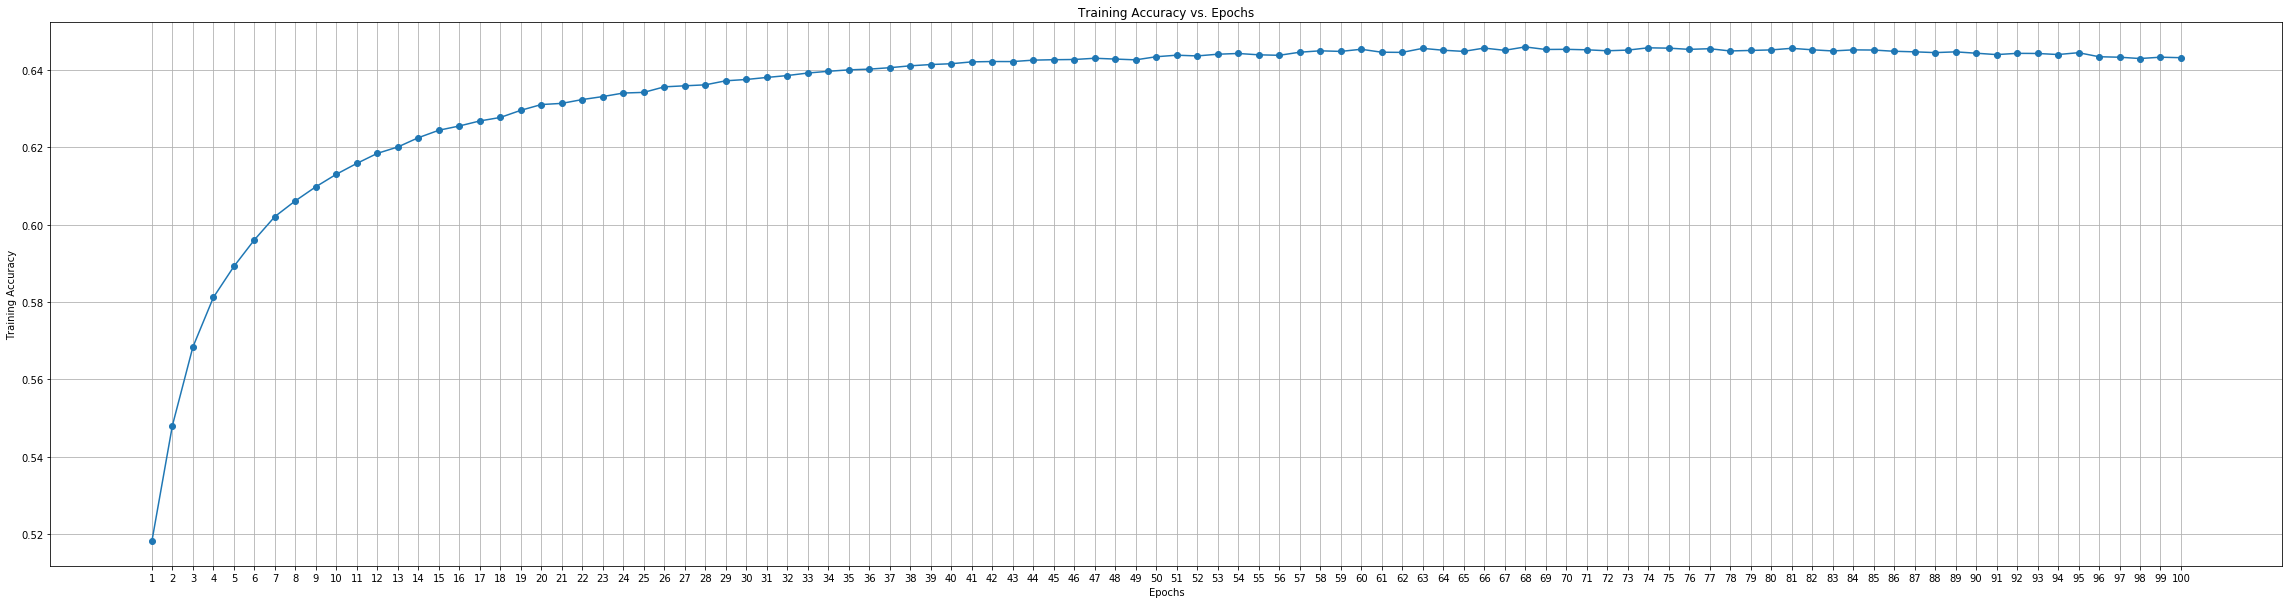

In [18]:
epochs_list = [i for i in range(1,100+1)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()

In [19]:
print(sum(train_accuracies))

63.48229098320007


In [20]:
print(max(train_accuracies))

0.6459574
